## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   1.027840  1686.986880  0.591469   8.051028  1.661288
1  97.877452  1287.544867  0.531272  10.001599  1.282048
2  59.435771   621.624823  0.637459   9.303998  1.491840
3  92.096339  1523.474886  0.986929   3.995511  1.480378
4   5.060369  1602.239158  0.048653   3.442886  1.495339


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0128107	total: 58.1ms	remaining: 58.1s
1:	learn: 1.0048808	total: 58.9ms	remaining: 29.4s
2:	learn: 0.9969433	total: 59.7ms	remaining: 19.9s
3:	learn: 0.9903549	total: 60.4ms	remaining: 15s
4:	learn: 0.9824042	total: 62.1ms	remaining: 12.4s
5:	learn: 0.9748471	total: 63.8ms	remaining: 10.6s
6:	learn: 0.9690204	total: 64.3ms	remaining: 9.13s
7:	learn: 0.9603829	total: 65ms	remaining: 8.06s
8:	learn: 0.9512240	total: 65.5ms	remaining: 7.22s
9:	learn: 0.9426911	total: 66ms	remaining: 6.53s
10:	learn: 0.9346726	total: 66.6ms	remaining: 5.98s
11:	learn: 0.9261474	total: 67.1ms	remaining: 5.52s
12:	learn: 0.9170683	total: 67.6ms	remaining: 5.13s
13:	learn: 0.9098016	total: 67.8ms	remaining: 4.77s
14:	learn: 0.9034987	total: 68.2ms	remaining: 4.48s
15:	learn: 0.8962794	total: 68.7ms	remaining: 4.22s
16:	learn: 0.8902256	total: 69.1ms	remaining: 3.99s
17:	learn: 0.8844627	total: 69.6ms	remaining: 3.79s
18:	learn: 0.8785673	total: 69.9ms	remaining: 3.61

93:	learn: 0.5126554	total: 103ms	remaining: 991ms
94:	learn: 0.5092418	total: 103ms	remaining: 984ms
95:	learn: 0.5065324	total: 104ms	remaining: 976ms
96:	learn: 0.5028167	total: 104ms	remaining: 970ms
97:	learn: 0.4990744	total: 105ms	remaining: 963ms
98:	learn: 0.4963160	total: 105ms	remaining: 955ms
99:	learn: 0.4929935	total: 105ms	remaining: 948ms
100:	learn: 0.4896841	total: 106ms	remaining: 941ms
101:	learn: 0.4864502	total: 106ms	remaining: 936ms
102:	learn: 0.4837994	total: 107ms	remaining: 932ms
103:	learn: 0.4811440	total: 107ms	remaining: 925ms
104:	learn: 0.4784037	total: 108ms	remaining: 919ms
105:	learn: 0.4752495	total: 108ms	remaining: 913ms
106:	learn: 0.4723525	total: 109ms	remaining: 907ms
107:	learn: 0.4704119	total: 109ms	remaining: 902ms
108:	learn: 0.4676577	total: 110ms	remaining: 896ms
109:	learn: 0.4648769	total: 110ms	remaining: 891ms
110:	learn: 0.4628759	total: 111ms	remaining: 885ms
111:	learn: 0.4603495	total: 111ms	remaining: 880ms
112:	learn: 0.45800

267:	learn: 0.2376767	total: 183ms	remaining: 500ms
268:	learn: 0.2359379	total: 184ms	remaining: 499ms
269:	learn: 0.2353729	total: 184ms	remaining: 498ms
270:	learn: 0.2350320	total: 185ms	remaining: 497ms
271:	learn: 0.2344449	total: 185ms	remaining: 495ms
272:	learn: 0.2341590	total: 185ms	remaining: 494ms
273:	learn: 0.2333852	total: 186ms	remaining: 493ms
274:	learn: 0.2321149	total: 186ms	remaining: 491ms
275:	learn: 0.2312764	total: 187ms	remaining: 490ms
276:	learn: 0.2306823	total: 187ms	remaining: 489ms
277:	learn: 0.2300339	total: 188ms	remaining: 487ms
278:	learn: 0.2295460	total: 188ms	remaining: 486ms
279:	learn: 0.2292775	total: 189ms	remaining: 485ms
280:	learn: 0.2285170	total: 189ms	remaining: 484ms
281:	learn: 0.2282284	total: 189ms	remaining: 482ms
282:	learn: 0.2277490	total: 190ms	remaining: 481ms
283:	learn: 0.2272757	total: 190ms	remaining: 480ms
284:	learn: 0.2267076	total: 191ms	remaining: 479ms
285:	learn: 0.2261961	total: 191ms	remaining: 478ms
286:	learn: 

490:	learn: 0.1147582	total: 284ms	remaining: 294ms
491:	learn: 0.1143580	total: 285ms	remaining: 294ms
492:	learn: 0.1140962	total: 285ms	remaining: 293ms
493:	learn: 0.1137658	total: 286ms	remaining: 292ms
494:	learn: 0.1133602	total: 286ms	remaining: 292ms
495:	learn: 0.1129610	total: 287ms	remaining: 291ms
496:	learn: 0.1127079	total: 287ms	remaining: 291ms
497:	learn: 0.1123143	total: 288ms	remaining: 290ms
498:	learn: 0.1119688	total: 289ms	remaining: 290ms
499:	learn: 0.1115817	total: 289ms	remaining: 289ms
500:	learn: 0.1112430	total: 289ms	remaining: 288ms
501:	learn: 0.1108695	total: 290ms	remaining: 288ms
502:	learn: 0.1104977	total: 290ms	remaining: 287ms
503:	learn: 0.1102323	total: 291ms	remaining: 286ms
504:	learn: 0.1098499	total: 291ms	remaining: 285ms
505:	learn: 0.1094616	total: 292ms	remaining: 285ms
506:	learn: 0.1091327	total: 292ms	remaining: 284ms
507:	learn: 0.1087674	total: 293ms	remaining: 283ms
508:	learn: 0.1083735	total: 293ms	remaining: 283ms
509:	learn: 

674:	learn: 0.0723295	total: 365ms	remaining: 176ms
675:	learn: 0.0721529	total: 366ms	remaining: 175ms
676:	learn: 0.0719137	total: 366ms	remaining: 175ms
677:	learn: 0.0718909	total: 367ms	remaining: 174ms
678:	learn: 0.0718346	total: 367ms	remaining: 174ms
679:	learn: 0.0717433	total: 367ms	remaining: 173ms
680:	learn: 0.0715082	total: 368ms	remaining: 172ms
681:	learn: 0.0714631	total: 369ms	remaining: 172ms
682:	learn: 0.0713736	total: 369ms	remaining: 171ms
683:	learn: 0.0713256	total: 370ms	remaining: 171ms
684:	learn: 0.0712372	total: 370ms	remaining: 170ms
685:	learn: 0.0710679	total: 371ms	remaining: 170ms
686:	learn: 0.0708383	total: 371ms	remaining: 169ms
687:	learn: 0.0707841	total: 372ms	remaining: 169ms
688:	learn: 0.0705390	total: 372ms	remaining: 168ms
689:	learn: 0.0703218	total: 373ms	remaining: 168ms
690:	learn: 0.0700969	total: 373ms	remaining: 167ms
691:	learn: 0.0698129	total: 374ms	remaining: 166ms
692:	learn: 0.0696592	total: 374ms	remaining: 166ms
693:	learn: 

892:	learn: 0.0440697	total: 465ms	remaining: 55.8ms
893:	learn: 0.0439829	total: 466ms	remaining: 55.3ms
894:	learn: 0.0438977	total: 467ms	remaining: 54.7ms
895:	learn: 0.0437936	total: 467ms	remaining: 54.2ms
896:	learn: 0.0436464	total: 467ms	remaining: 53.7ms
897:	learn: 0.0435553	total: 468ms	remaining: 53.2ms
898:	learn: 0.0433823	total: 469ms	remaining: 52.6ms
899:	learn: 0.0432857	total: 469ms	remaining: 52.1ms
900:	learn: 0.0432076	total: 469ms	remaining: 51.6ms
901:	learn: 0.0431073	total: 470ms	remaining: 51ms
902:	learn: 0.0429373	total: 470ms	remaining: 50.5ms
903:	learn: 0.0427678	total: 471ms	remaining: 50ms
904:	learn: 0.0426737	total: 471ms	remaining: 49.4ms
905:	learn: 0.0425855	total: 471ms	remaining: 48.9ms
906:	learn: 0.0424934	total: 472ms	remaining: 48.4ms
907:	learn: 0.0423835	total: 472ms	remaining: 47.9ms
908:	learn: 0.0422936	total: 473ms	remaining: 47.3ms
909:	learn: 0.0421862	total: 473ms	remaining: 46.8ms
910:	learn: 0.0420985	total: 474ms	remaining: 46.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

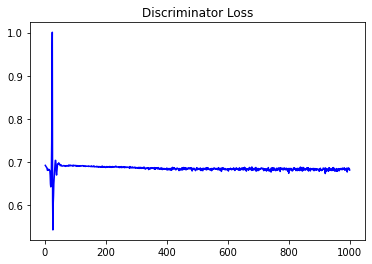

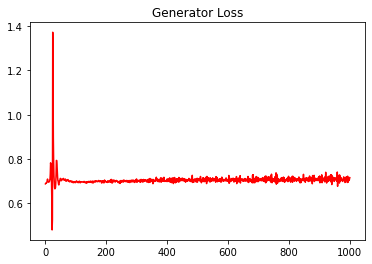

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.20962241951428207


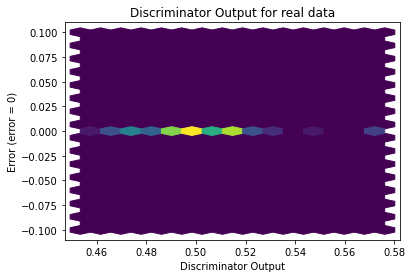

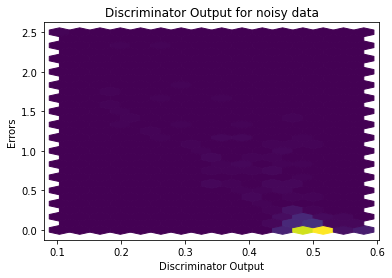

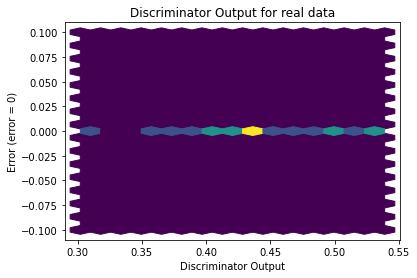

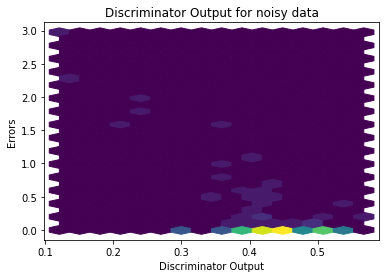

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


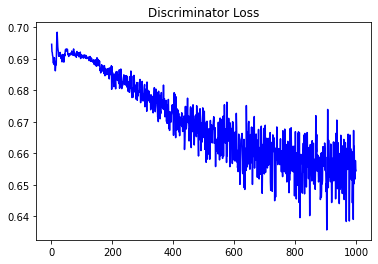

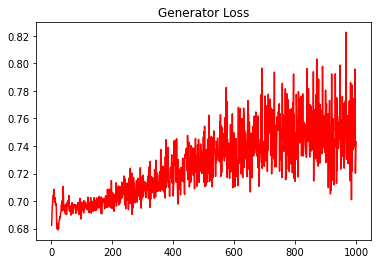

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.34078840703105157


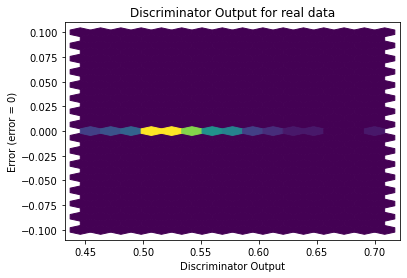

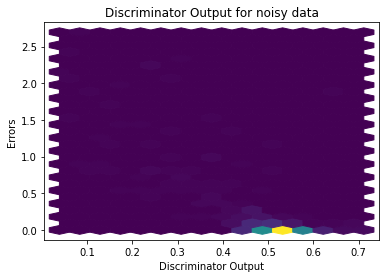

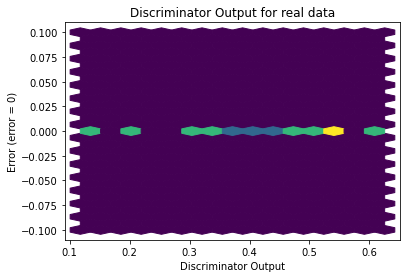

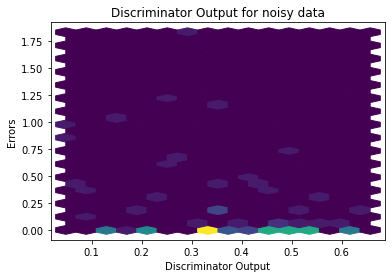

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1386]], requires_grad=True)
